Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "used_cars_data-1.csv"   # remember to change data path

# read the dataset
dataset= pd.read_csv(data_path)

In [3]:
# check the first few rows of the data
dataset.sample(10)


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3782,3782,Mahindra Thar DI 4X4,Kochi,2019,13024,Diesel,Manual,First,18.06 kmpl,2523 CC,63 bhp,7.0,11.390,9.11
123,123,Maruti Wagon R LXI BS IV,Pune,2011,43874,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,5.510,2.45
4806,4806,Maruti Omni 8 Seater BSII,Jaipur,2004,66624,Petrol,Manual,Third,19.7 kmpl,796 CC,35 bhp,8.0,7.880,0.85
4430,4430,Datsun Redi GO Sport,Bangalore,2017,12000,Petrol,Manual,First,22.7 kmpl,799 CC,53 bhp,5.0,5.635,3.10
3041,3041,Maruti Ertiga VXI,Delhi,2014,17585,Petrol,Manual,First,16.02 kmpl,1373 CC,93.7 bhp,7.0,11.270,6.35
3544,3544,Jeep Compass 2.0 Limited Option 4X4,Jaipur,2017,45000,Diesel,Manual,First,16.3 kmpl,1956 CC,170 bhp,5.0,25.540,20.00
861,861,Hyundai i20 Magna 1.2,Hyderabad,2014,70089,Petrol,Manual,First,18.6 kmpl,1197 CC,81.83 bhp,5.0,10.250,5.35
3016,3016,Tata Safari DICOR 2.2 LX 4x2,Bangalore,2011,80000,Diesel,Manual,First,13.93 kmpl,2179 CC,138.03 bhp,7.0,16.950,4.50
196,196,Hyundai i10 Magna,Jaipur,2015,43571,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,10.250,3.55
569,569,Toyota Corolla Altis 1.8 Sport,Pune,2010,31000,Petrol,Manual,First,12.5 kmpl,1794 CC,132 bhp,5.0,21.085,5.00


In [4]:
# Check the data types
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [5]:
# check for missing values
dataset.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

**Mileage**

In [6]:
# display some descriptive statistics of the data

dataset.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


In [7]:
# select only the features that are object data types and observe
cat_dataset = dataset.select_dtypes(include = "object")

cat_dataset.describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,7253,7253,7253,7253,7253,7251,7207,7078
unique,2041,11,5,2,4,450,150,385
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp
freq,55,949,3852,5204,5952,207,732,280


In [8]:
#Check for the categories and their counts
for col in cat_dataset:
  print(dataset[col].value_counts())
  print("-" * 50)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------

**Data Cleaning**

In [9]:
#dataset.drop("Mileage", axis = 1, inplace = True)

In [10]:
dataset.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

**Engine**

In [11]:
dataset["Engine"].isnull().sum()

46

In [12]:
#replace the nan value with the median 
# Replacing the "CC" unit in the "Engine" column with an empty string
dataset["Engine"] = dataset["Engine"].str.replace("CC", "")

# Converting the "Engine" column to float
dataset["Engine"] = dataset["Engine"].astype(float)

# Replacing the NaN values in the "Engine" column with the median
dataset["Engine"].fillna(dataset["Engine"].median(), inplace=True)

In [13]:
dataset["Engine"].isnull().sum()

0

**Mileage**

In [14]:
# Replacing the "km/kg and the kmpl" unit in the "Mileage" column with an empty string
dataset["Mileage"] = dataset["Mileage"].str.replace("km/kg", "")

dataset["Mileage"] = dataset["Mileage"].str.strip("kmpl")

In [15]:
# Converting the "Mileage" column to float
dataset["Mileage"] = dataset["Mileage"].astype(float)

# Replacing the NaN values in the "Mileage" column with the median
dataset["Mileage"].fillna(dataset["Mileage"].median(), inplace=True)

In [16]:
dataset["Mileage"].isnull().sum()

0

**Power**

In [17]:
# Replacing the NaN values in the "Power" column with the median

dataset["Power"] = dataset["Power"].str.replace(" bhp", "").astype(float)

# Replacing the NaN values in the "Power" column with the median
dataset["Power"].fillna(dataset["Power"].median(), inplace=True)

In [18]:
dataset["Power"].isnull().sum()

0

**Seats**

In [19]:
dataset["Seats"].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [20]:

# Replace the NaN values in the "seats" column with the median
dataset["Seats"].fillna(dataset["Seats"].median(), inplace=True)

In [21]:
dataset["Seats"].isnull().sum()

0

**Price**

In [22]:
dataset["Price"].unique()

array([ 1.75, 12.5 ,  4.5 , ..., 17.56,  7.43,   nan])

In [23]:
# Replace the NaN values in the "Price" column with the median
dataset["Price"].fillna(dataset["Price"].median(), inplace=True)

In [24]:
dataset["Price"].isnull().sum()

0

**Price is the column to be predicted this would be dropped**

In [25]:
num_data = dataset.select_dtypes(include = "number")

In [26]:
num_data

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
0,0,2010,72000,26.60,998.0,58.16,5.0,5.51,1.75
1,1,2015,41000,19.67,1582.0,126.20,5.0,16.06,12.50
2,2,2011,46000,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,2012,87000,20.77,1248.0,88.76,7.0,11.27,6.00
4,4,2013,40670,15.20,1968.0,140.80,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...
7248,7248,2011,89411,20.54,1598.0,103.60,5.0,13.23,5.64
7249,7249,2015,59000,17.21,1197.0,103.60,5.0,10.15,5.64
7250,7250,2012,28000,23.08,1461.0,63.10,5.0,9.47,5.64
7251,7251,2013,52262,17.20,1197.0,103.60,5.0,10.15,5.64


**Outlier detection**

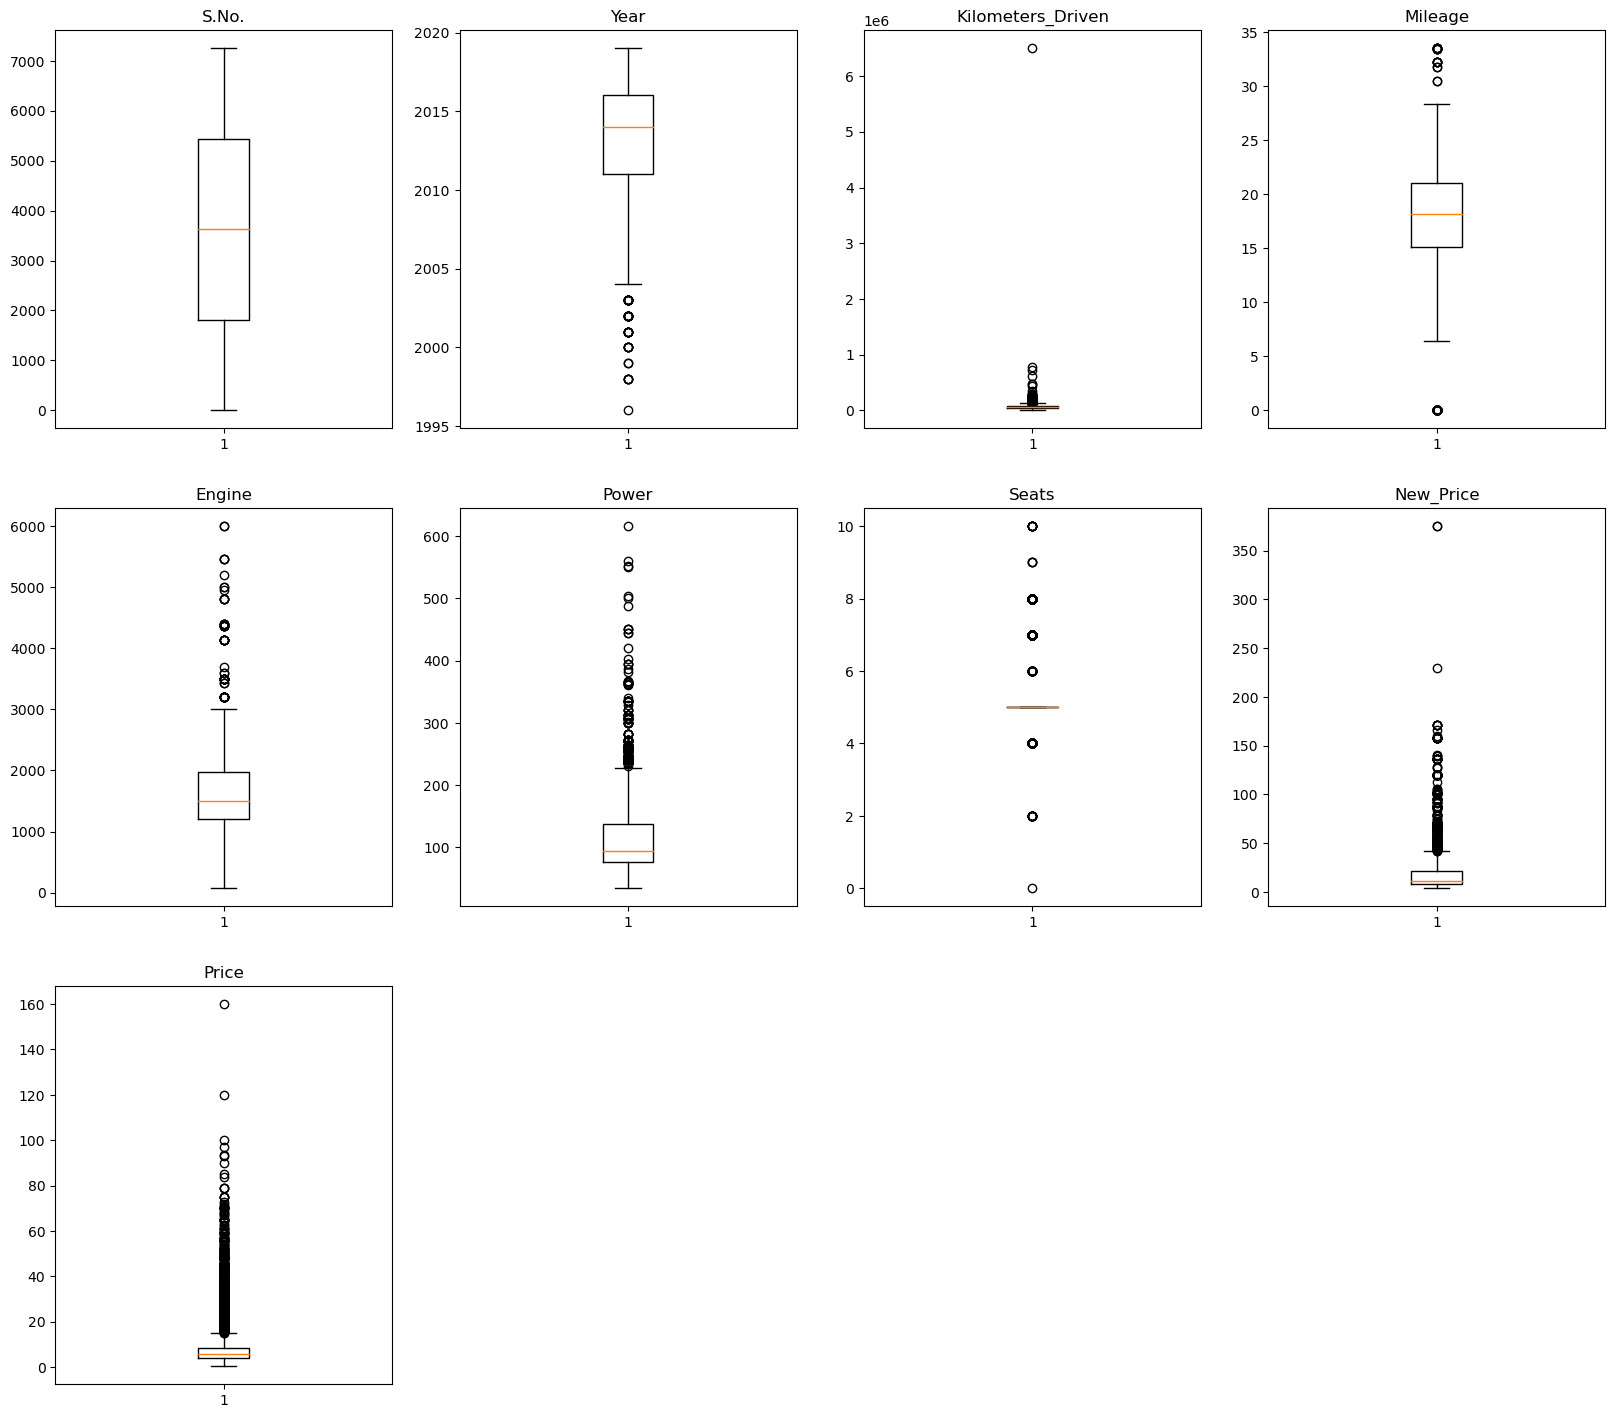

In [27]:
plt.figure(figsize = (20, 30))

for i, variable in enumerate(num_data):
  plt.subplot(5, 4, i + 1)
  plt.boxplot(dataset[variable])
  plt.title(variable)

plt.show()

**outlier treatment**

In [28]:
num_data.drop("Price", axis = 1, inplace = True)

num_data.columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

In [29]:
l1 = [-200, 5, 0, 1000]

np.clip(l1, 0, 5)

array([0, 5, 0, 5])

In [30]:
def treat_outliers(df, col):
  """
  treat outliers in variable
  col: str, name of the numerical variable
  df: dataframe
  """
  Q1 = dataset[col].quantile(0.25)  # 25th quantile
  Q3 = dataset[col].quantile(0.75) # upper quantile
  IQR = Q3 - Q1
  lower_whisker = Q1 - (1.5 * IQR)
  upper_whisker = Q3 + (1.5 * IQR)
  df[col] = np.clip(dataset[col], lower_whisker, upper_whisker)
  return dataset

def treat_outliers_all(dataset, col_list):
  for c in col_list:
    df = treat_outliers(dataset, c)
  return dataset

In [31]:
dataset = treat_outliers_all(dataset, num_data)

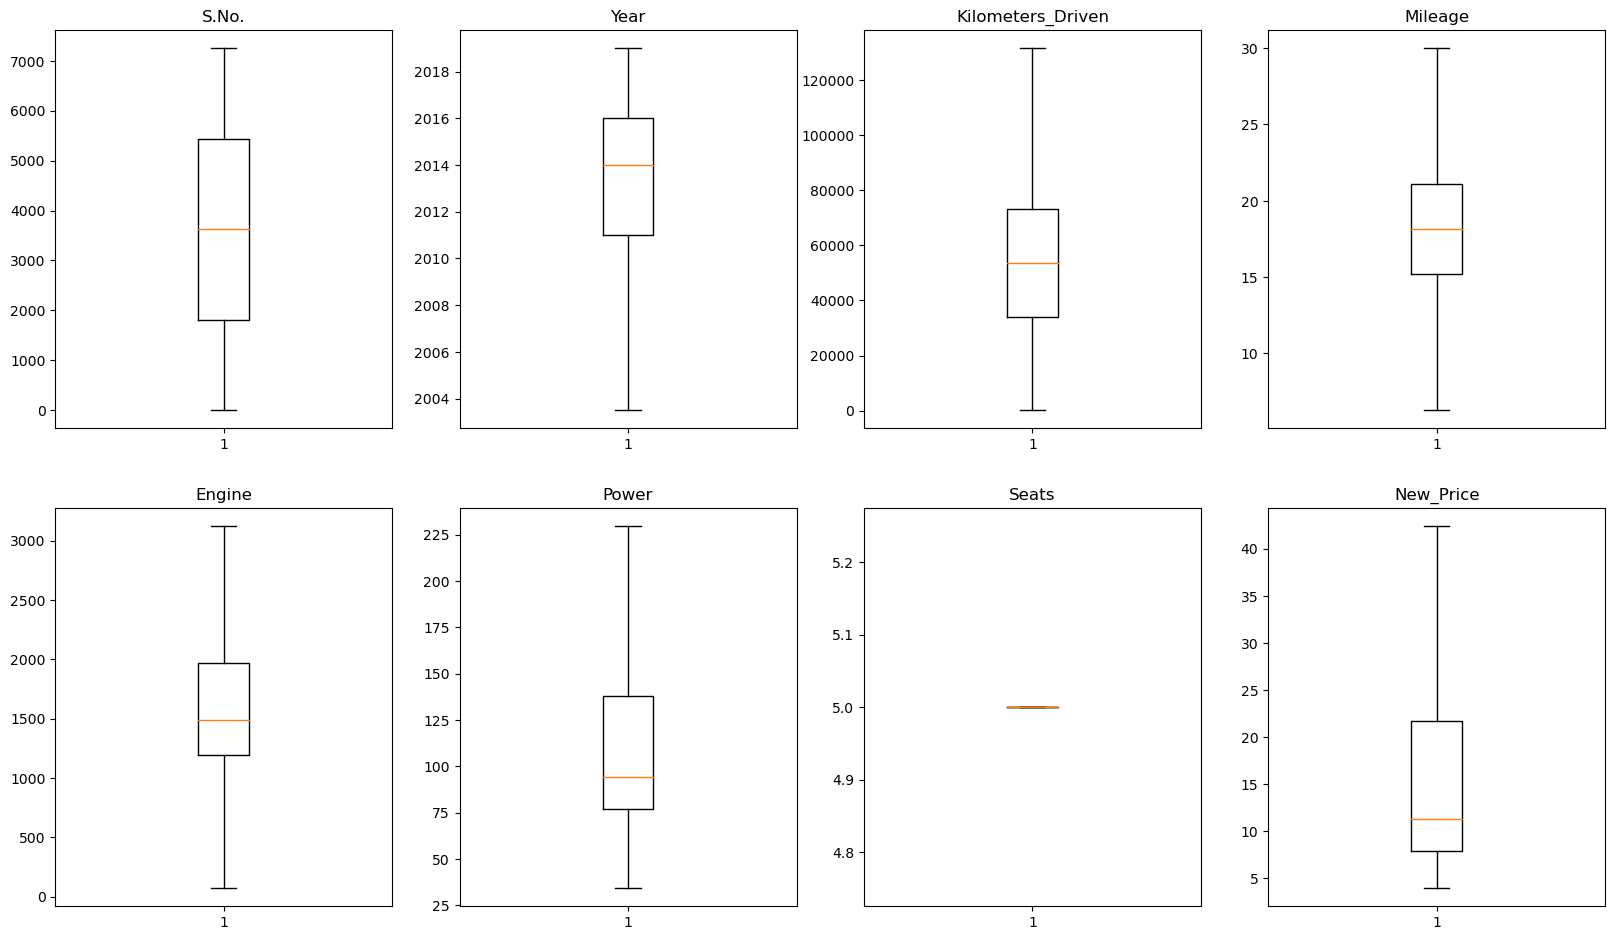

In [32]:
# outlier detection using boxplot

plt.figure(figsize = (20, 30))

for i, variable in enumerate(num_data):
  plt.subplot(5, 4, i + 1)
  plt.boxplot(dataset[variable], whis=1.5)
  plt.title(variable)

plt.show()

**Model Building**

In [33]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

In [41]:
# Select features and target using the numerical columns only
X = dataset[["S.No.","Year","Kilometers_Driven","Mileage","Engine","Power","Seats","New_Price"]]
y = dataset["Price"] 
#df.columns

In [64]:
#  check there are missing values
X.isnull().sum()

S.No.                0
Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
dtype: int64

**Create the train and test dataset**

In [36]:
# convert all categorical features to numerical data: OneHotEncoding

#X = pd.get_dummies(X, drop_first = True)

#X.head()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X, y = X_train, y_train

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price
226,226,2015.0,46173.0,19.01,1461.0,108.50,5.0,16.65
6309,6309,2015.0,36933.0,21.10,814.0,55.20,5.0,10.25
5725,5725,2013.0,120000.0,20.00,1968.0,138.10,5.0,25.83
1076,1076,2016.0,68000.0,10.91,3123.0,197.00,5.0,35.29
5840,5840,2007.0,131500.0,13.10,2499.0,141.00,5.0,35.29
...,...,...,...,...,...,...,...,...
3804,3804,2015.0,45000.0,21.90,1396.0,88.76,5.0,10.25
4000,4000,2011.0,37000.0,20.00,1399.0,68.05,5.0,7.65
2479,2479,2013.0,44378.0,25.44,936.0,57.60,5.0,11.30
2524,2524,2003.5,101000.0,17.30,1061.0,64.00,5.0,5.51


**Scaling the dataset**

In [44]:
#Create a function for the min max scaler used to rescale the Values, this would be used for all categories
def min_max_standerdization(X_train, X_test, X_val):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val)
    return X_train_scaled, X_test_scaled, X_val_scaled

X_train_scaled, X_test_scaled, X_val_scaled = min_max_standerdization(X_train, X_test, X_val)

In [45]:
#the dataset conversion to pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)

In [46]:
X_train_scaled

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price
0,0.031030,0.741935,0.348151,0.536889,0.334934,0.380294,0.0,0.330952
1,0.869949,0.741935,0.277563,0.625000,0.076030,0.107486,0.0,0.164697
2,0.789408,0.612903,0.912147,0.578626,0.537815,0.531798,0.0,0.569425
3,0.148255,0.806452,0.514897,0.195405,1.000000,0.833269,0.0,0.815171
4,0.805268,0.225806,1.000000,0.287732,0.750300,0.546641,0.0,0.815171
...,...,...,...,...,...,...,...,...
4636,0.524479,0.741935,0.339190,0.658727,0.308924,0.279258,0.0,0.164697
4637,0.551510,0.483871,0.278075,0.578626,0.310124,0.173257,0.0,0.097155
4638,0.341746,0.612903,0.334439,0.807968,0.124850,0.119770,0.0,0.191973
4639,0.347952,0.000000,0.766998,0.464798,0.174870,0.152527,0.0,0.041564


**plot the boxplot and effect of scaling**

Text(0.5, 1.0, 'X_train After Using Min Max Scaler')

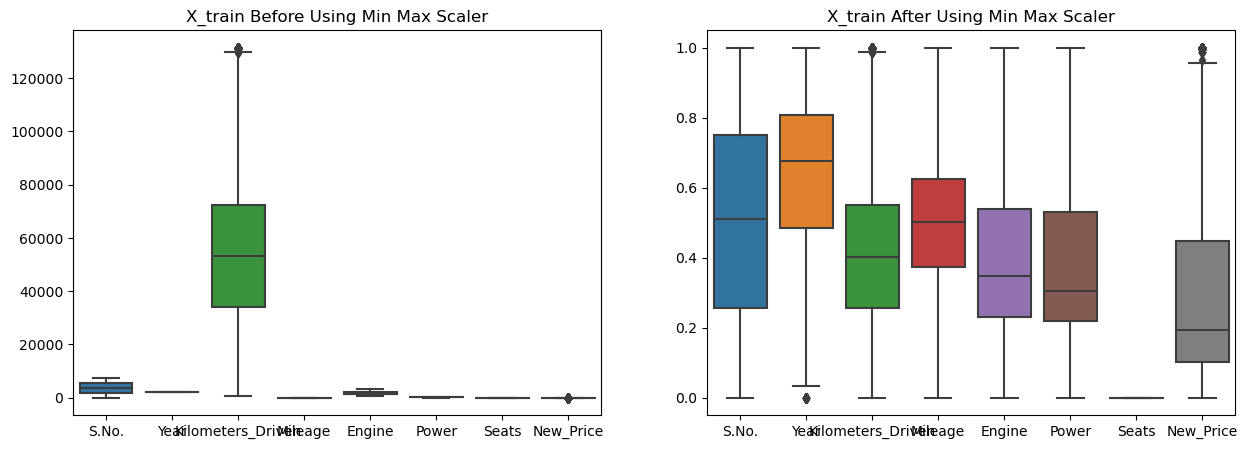

In [47]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
#Before the Xtrain is scaled
sns.boxplot(data=X_train)
#After the Xtrain is scaled
plt.title('X_train Before Using Min Max Scaler')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Using Min Max Scaler')

Model Seclection For Regression Task

Comment: Linear Regression and Multiple Linear Regression would be used for model regression selection.

Simple Regression Model

NB: Reshaping sklearn accepts data in matrix form as rows and columns.Therefore if it is a single feature it has to be reshaped to have rows and columns. The target would not be reshaped. In order to reshape a series,the numpy array is converted using series.to numpy() and the application of .reshape(-1,1) function, where -1 is used a a place holder for all the rows and 1 represents the column. This would be used for all Reshaping in this Jupyter Notebook

In [48]:
from sklearn.linear_model import LinearRegression # importing linear model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
model = LinearRegression()

In [50]:
y_train

226      8.92
6309     5.64
5725     6.95
1076    29.50
5840     5.50
        ...  
3804     3.45
4000     1.80
2479     3.85
2524     0.95
4695     5.75
Name: Price, Length: 4641, dtype: float64

In [51]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [52]:
X_train_scaled.columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

**Re-shape the Attributes**

**Mileage**

**Linear Regression**

In [53]:
# Application of the reshaping 
X_train_scaled_mileges=X_train_scaled['Mileage'].to_numpy().reshape(-1,1)
X_val_scaled_mileges= X_val_scaled['Mileage'].to_numpy().reshape(-1,1)
X_test_scaled_mileges= X_test_scaled['Mileage'].to_numpy().reshape(-1,1)

In [54]:
# The model results
def model_result(model):
    model.fit(X_train_scaled_mileges, y_train)
    basem_preds = model.predict(X_test_scaled_mileges)
    
    mean_abs = mean_absolute_error(y_test, basem_preds)
    mean_squared = mean_squared_error(y_test,basem_preds)
    r2 = r2_score(y_test, basem_preds)
    
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.4f}")

model_result(model)

The result of the mean_absolute_error is: 5.95
The result of the root mean squared error is : 9.51
The result of the coefficient of determination is: 0.0878


**Multiple Linear Regression**

In [55]:
# The model test report
def model_result(model):
    model.fit(X_train_scaled, y_train)
    basem_preds = model.predict(X_test_scaled)
    
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test,basem_preds)
    
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.4f}")


#using all the columns from the dataset both numerical and categorical
model_result(model)

The result of the mean_absolute_error is: 3.53
The result of the root mean squared error is : 6.07
The result of the coefficient of determination is: 0.6280


Multiple linear Regression performed better than Simple linear Regression in model selection as multiple linear model had a higher r2 score and a lower mae and rmse.

**Ridge Regression**

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()

In [57]:
def model_result(model):
    model.fit(X_train_scaled, y_train)
    basem_preds = model.predict(X_test_scaled)
    
    mean_abs = mean_absolute_error(y_test, basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test, basem_preds):.4f}")



model_result(ridge)

The result of the mean_absolute_error is: 3.52
The result of the root mean squared error is : 6.07
The result of the coefficient of determination is: 0.6280


**Lasso Regression**

In [58]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()

In [59]:
def model_result(model):
    model.fit(X_train_scaled, y_train)
    basem_preds = model.predict(X_test_scaled)
    
    mean_abs = mean_absolute_error(y_test, basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test, basem_preds):.4f}")



model_result(lasso)

The result of the mean_absolute_error is: 4.29
The result of the root mean squared error is : 7.73
The result of the coefficient of determination is: 0.3972


**Random Forest Regressor**

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()

In [61]:
def model_result(model):
    model.fit(X_train_scaled, y_train)
    basem_preds = model.predict(X_test_scaled)
    
    mean_abs = mean_absolute_error(y_test, basem_preds)
    mean_squared = mean_squared_error(y_test, basem_preds)
    
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test, basem_preds):.4f}")


#using all the columns from the dataset
model_result(rf)

The result of the mean_absolute_error is: 1.30
The result of the root mean squared error is : 3.12
The result of the coefficient of determination is: 0.9019


Random forest had the best performance with an r2 score of 0.9019 and rmse of 3.12 and mae of 1.30 of the three models used. this had the best performance because the lower the rmse and mae the better the performance of the model and also the r2 score was high showing a positive correlation.

**FEATURE REMOVAL USING FEATURE IMPORTANCE**

In [62]:
feature_names = X_train.columns.to_list()

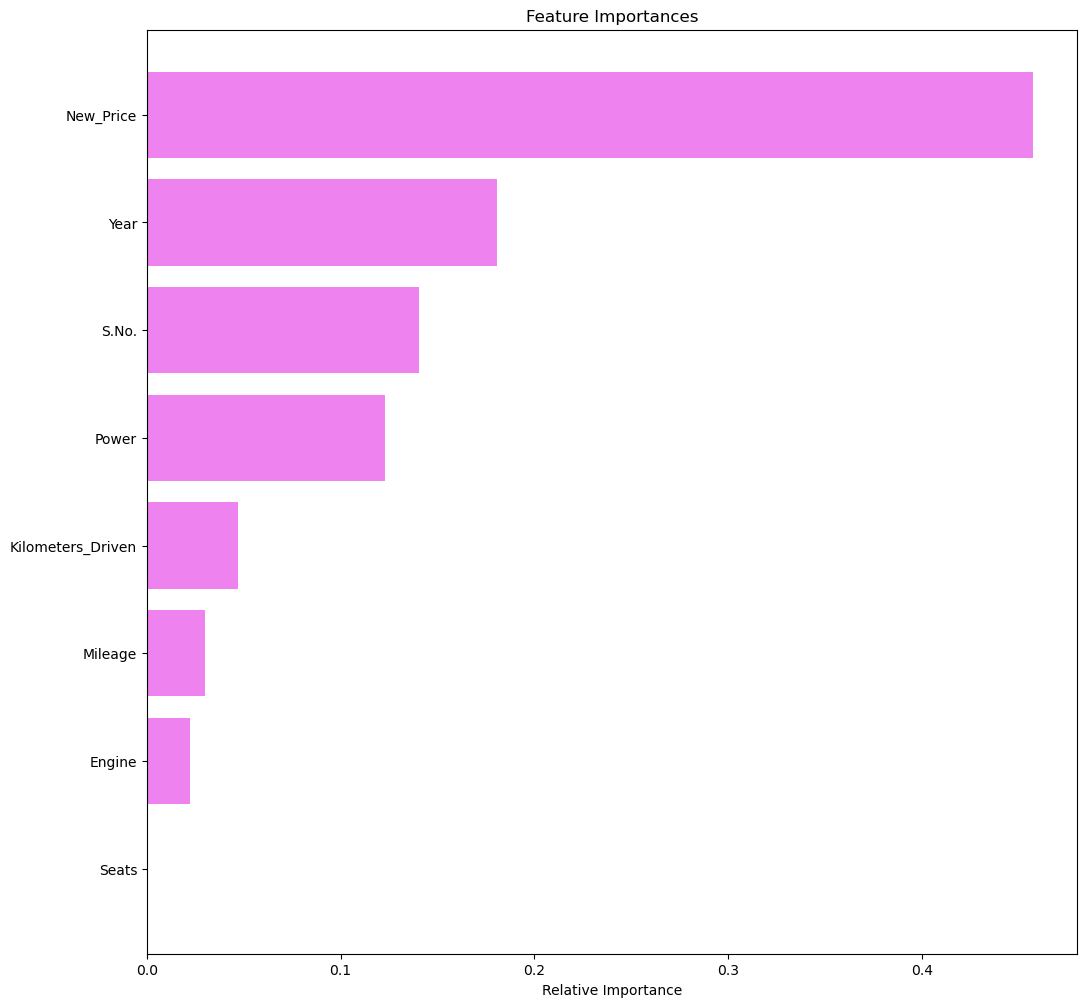

In [63]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "violet", 
         align = "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Comment: This shows that the prices of new models of the car determines the prices of the used cars in this case people wpuld want to compare how much they would get a brand new car to how much the used car should be. Based on the feature importance as well, the Year of the car also contributes to be the second highest feature to predict the price so a car made in 2010 would be worth more than a car made in 2008 so the newer the model/ year of release the higher the price. 